## Importing Essential Libraries

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst
import math
from collections import Counter
import datetime


pd.set_option('display.max_columns', None,'display.max_row', None)
# pd.set_option('display.max_rows', 1000)

default_figsize = (15,5)

## Read and visualize the intermediate CSV

In [2]:
df = pd.read_csv('joined_csv.csv')
#df.drop(columns=['investment_delta','norm_amount_delta','momentum','ROI','max_norm_amount_delta',\
#                 'mean_norm_amount_delta','roi_from_mean_momentum','Unnamed: 0', 'uuid'], inplace= True)
df.head()

,company_name,rank,country_code,city,status,category_groups_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,Commerce and Shopping,Financial Services,Lending and Investments,Payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_norm_amount_delta,fd_rd_momentum,fd_rd_mean_norm_amount_delta,fd_rd_mean_momentum,fd_rd_num_invested_by_top_100,fd_rd_first_fund_raised,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_uuid,funds_raised_amount_usd,acq_acquired_on,acq_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,level_0,raised_amount_usd,post_money_valuation_usd,investor_count,index,company_uuid
0,Codementor,9503.0,USA,Mountain View,operating,"Commerce and Shopping,Education,Information Te...",5.0,3400000.0,2013-01-01,11-50,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.6666666666666666, 0.2857142857142857]","[0.4440300164291105, 0.22771521934668507]",0.47619,0.335873,0.0,3400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24453b28-8d76-48a3-a988-11dc87f462b6,3.0,12114.0,1.00,0.00,0.833333,0.0,0.833333,0.0,6.0,2.0,3400000.0,0.0,13.0,37531.0,00002470-bff7-6226-5800-0ca1b3787b6f
1,AutoOffer,79611.0,DNK,Copenhagen,operating,"Commerce and Shopping,Financial Services,Inter...",2.0,431576.0,2013-01-01,1-10,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2978.0,1.00,0.00,0.500000,0.5,0.000000,0.0,2.0,6.0,0.0,0.0,1.0,106186.0,0000d497-c93a-eea3-eeb0-a943dfb4f71e
2,Lillii RNB Inc,233387.0,USA,Atlanta,operating,"Commerce and Shopping,Professional Services",NaN,NaN,2013-02-13,unknown,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2890.0,0.00,1.00,0.000000,0.0,0.000000,0.0,1.0,NaN,NaN,NaN,NaN,NaN,00011be5-d105-eaa0-69d6-6064e74916b2
3,SOICO,724461.0,JPN,Tokyo,operating,"Financial Services,Professional Services",NaN,NaN,2018-01-01,unknown,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8752.0,0.75,0.25,0.000000,0.0,0.000000,0.0,4.0,NaN,NaN,NaN,NaN,NaN,0001a6ec-e7e9-4d1b-8a77-adb5ac815420
4,Codeboxr,446515.0,BGD,Dhaka,operating,"Commerce and Shopping,Design,Internet Services...",NaN,NaN,2011-11-01,1-10,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0004ad43-5818-a882-3731-0b8641d45aba


In [3]:
df.iloc[5000:].head()

,company_name,rank,country_code,city,status,category_groups_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,Commerce and Shopping,Financial Services,Lending and Investments,Payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_norm_amount_delta,fd_rd_momentum,fd_rd_mean_norm_amount_delta,fd_rd_mean_momentum,fd_rd_num_invested_by_top_100,fd_rd_first_fund_raised,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_uuid,funds_raised_amount_usd,acq_acquired_on,acq_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,level_0,raised_amount_usd,post_money_valuation_usd,investor_count,index,company_uuid
5000,Whatsnstore,1205837.0,NaN,NaN,closed,"Advertising,Commerce and Shopping,Internet Ser...",NaN,NaN,2011-01-01,1-10,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2188.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0c11e29f-4da2-6035-6e12-3145ddef8ec8
5001,xinhedai.com,1041805.0,CHN,Foochow,operating,"Financial Services,Internet Services",NaN,NaN,2012-12-18,unknown,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0c11ea84-8e35-41fa-b884-6bf9db80e3be
5002,Stoned Santa,162989.0,IND,Bangalore,operating,"Commerce and Shopping,Consumer Goods,Media and...",NaN,NaN,2016-12-25,11-50,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0c123e7a-e2ab-4885-b2b2-a70af1de4fb5
5003,The Mortgage Collaborative,745672.0,USA,San Diego,operating,"Financial Services,Real Estate",NaN,NaN,2013-01-01,11-50,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0c1254fd-77cb-4e5c-bbb9-5c7583f6ef8a
5004,Assistent.by,89985.0,BLR,Minsk,operating,"Financial Services,Internet Services,Professio...",1.0,750000.0,2010-01-01,11-50,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,6703.0,750000.0,0.0,2.0,61775.0,0c12b303-e2a4-e184-647b-3fa1261005a1


## Pre-process Data

In [4]:
df.drop(columns=['rank'],inplace= True)
#df = df.join(df_funds_related.set_index('org_uuid'))
#df.insert(0,'company_uuid',value = df.index)
#df.insert(5,'top_100_invested',value = df['num_invested_by_top_100'])
#df = df.drop(columns=['num_invested_by_top_100'])
df = df.reset_index(drop = True)
df.head()

,company_name,country_code,city,status,category_groups_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,Commerce and Shopping,Financial Services,Lending and Investments,Payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_norm_amount_delta,fd_rd_momentum,fd_rd_mean_norm_amount_delta,fd_rd_mean_momentum,fd_rd_num_invested_by_top_100,fd_rd_first_fund_raised,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_uuid,funds_raised_amount_usd,acq_acquired_on,acq_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,level_0,raised_amount_usd,post_money_valuation_usd,investor_count,index,company_uuid
0,Codementor,USA,Mountain View,operating,"Commerce and Shopping,Education,Information Te...",5.0,3400000.0,2013-01-01,11-50,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.6666666666666666, 0.2857142857142857]","[0.4440300164291105, 0.22771521934668507]",0.47619,0.335873,0.0,3400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24453b28-8d76-48a3-a988-11dc87f462b6,3.0,12114.0,1.00,0.00,0.833333,0.0,0.833333,0.0,6.0,2.0,3400000.0,0.0,13.0,37531.0,00002470-bff7-6226-5800-0ca1b3787b6f
1,AutoOffer,DNK,Copenhagen,operating,"Commerce and Shopping,Financial Services,Inter...",2.0,431576.0,2013-01-01,1-10,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2978.0,1.00,0.00,0.500000,0.5,0.000000,0.0,2.0,6.0,0.0,0.0,1.0,106186.0,0000d497-c93a-eea3-eeb0-a943dfb4f71e
2,Lillii RNB Inc,USA,Atlanta,operating,"Commerce and Shopping,Professional Services",NaN,NaN,2013-02-13,unknown,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2890.0,0.00,1.00,0.000000,0.0,0.000000,0.0,1.0,NaN,NaN,NaN,NaN,NaN,00011be5-d105-eaa0-69d6-6064e74916b2
3,SOICO,JPN,Tokyo,operating,"Financial Services,Professional Services",NaN,NaN,2018-01-01,unknown,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8752.0,0.75,0.25,0.000000,0.0,0.000000,0.0,4.0,NaN,NaN,NaN,NaN,NaN,0001a6ec-e7e9-4d1b-8a77-adb5ac815420
4,Codeboxr,BGD,Dhaka,operating,"Commerce and Shopping,Design,Internet Services...",NaN,NaN,2011-11-01,1-10,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0004ad43-5818-a882-3731-0b8641d45aba


In [5]:
df['has_parent'] = 1*~df['parent_org_parent_uuid'].isnull()

In [6]:
# One-hot encoder
def onehot_encoder(df: pd.DataFrame, col_name: str, num_selected: int) -> pd.DataFrame:
    '''
    Performs one-hot encoding on a dataframe's column for its values with most occurrences

    :param pd.DataFrame df: dataframe to be processed
    :param str col_name: name of the encoded column
    :param int num_selected: number of values with most occurrences
    :return: processed dataframe
    :rtype: pd.DataFrame
    '''
    series = df[col_name].value_counts()
    selected_col_name = series.head(num_selected).index.tolist()

    for item in selected_col_name:
        df[col_name + "_" + item] = np.where(df[col_name] == item, 1, 0) # whenever df[col_name] == cat replace it with 1 else 0
        
    df.drop(columns=col_name, inplace=True)
    return df

In [7]:
df.head()

,company_name,country_code,city,status,category_groups_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,Commerce and Shopping,Financial Services,Lending and Investments,Payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_norm_amount_delta,fd_rd_momentum,fd_rd_mean_norm_amount_delta,fd_rd_mean_momentum,fd_rd_num_invested_by_top_100,fd_rd_first_fund_raised,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_uuid,funds_raised_amount_usd,acq_acquired_on,acq_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,level_0,raised_amount_usd,post_money_valuation_usd,investor_count,index,company_uuid,has_parent
0,Codementor,USA,Mountain View,operating,"Commerce and Shopping,Education,Information Te...",5.0,3400000.0,2013-01-01,11-50,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.6666666666666666, 0.2857142857142857]","[0.4440300164291105, 0.22771521934668507]",0.47619,0.335873,0.0,3400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24453b28-8d76-48a3-a988-11dc87f462b6,3.0,12114.0,1.00,0.00,0.833333,0.0,0.833333,0.0,6.0,2.0,3400000.0,0.0,13.0,37531.0,00002470-bff7-6226-5800-0ca1b3787b6f,1
1,AutoOffer,DNK,Copenhagen,operating,"Commerce and Shopping,Financial Services,Inter...",2.0,431576.0,2013-01-01,1-10,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2978.0,1.00,0.00,0.500000,0.5,0.000000,0.0,2.0,6.0,0.0,0.0,1.0,106186.0,0000d497-c93a-eea3-eeb0-a943dfb4f71e,0
2,Lillii RNB Inc,USA,Atlanta,operating,"Commerce and Shopping,Professional Services",NaN,NaN,2013-02-13,unknown,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2890.0,0.00,1.00,0.000000,0.0,0.000000,0.0,1.0,NaN,NaN,NaN,NaN,NaN,00011be5-d105-eaa0-69d6-6064e74916b2,0
3,SOICO,JPN,Tokyo,operating,"Financial Services,Professional Services",NaN,NaN,2018-01-01,unknown,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8752.0,0.75,0.25,0.000000,0.0,0.000000,0.0,4.0,NaN,NaN,NaN,NaN,NaN,0001a6ec-e7e9-4d1b-8a77-adb5ac815420,0
4,Codeboxr,BGD,Dhaka,operating,"Commerce and Shopping,Design,Internet Services...",NaN,NaN,2011-11-01,1-10,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0004ad43-5818-a882-3731-0b8641d45aba,0


In [8]:
# #make sure to do <pip install pycountry-convert> and <pip install geopy>
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, country_alpha3_to_country_alpha2
#import pycountry_convert
from geopy.geocoders import Nominatim

def get_continent(col):
    try:
        cn_a2_code =  country_alpha3_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_continent)

df['continent'] = df['country_code'].apply(get_continent)

In [9]:
df['continent'] = df['continent'].apply(lambda x: np.nan if x=='Unknown' else x)
df['continent'].value_counts()

df = onehot_encoder(df, 'continent', 6)

df.head()

,company_name,country_code,city,status,category_groups_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,Commerce and Shopping,Financial Services,Lending and Investments,Payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_norm_amount_delta,fd_rd_momentum,fd_rd_mean_norm_amount_delta,fd_rd_mean_momentum,fd_rd_num_invested_by_top_100,fd_rd_first_fund_raised,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_uuid,funds_raised_amount_usd,acq_acquired_on,acq_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,level_0,raised_amount_usd,post_money_valuation_usd,investor_count,index,company_uuid,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_OC,continent_AF
0,Codementor,USA,Mountain View,operating,"Commerce and Shopping,Education,Information Te...",5.0,3400000.0,2013-01-01,11-50,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.6666666666666666, 0.2857142857142857]","[0.4440300164291105, 0.22771521934668507]",0.47619,0.335873,0.0,3400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24453b28-8d76-48a3-a988-11dc87f462b6,3.0,12114.0,1.00,0.00,0.833333,0.0,0.833333,0.0,6.0,2.0,3400000.0,0.0,13.0,37531.0,00002470-bff7-6226-5800-0ca1b3787b6f,1,1,0,0,0,0,0
1,AutoOffer,DNK,Copenhagen,operating,"Commerce and Shopping,Financial Services,Inter...",2.0,431576.0,2013-01-01,1-10,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2978.0,1.00,0.00,0.500000,0.5,0.000000,0.0,2.0,6.0,0.0,0.0,1.0,106186.0,0000d497-c93a-eea3-eeb0-a943dfb4f71e,0,0,1,0,0,0,0
2,Lillii RNB Inc,USA,Atlanta,operating,"Commerce and Shopping,Professional Services",NaN,NaN,2013-02-13,unknown,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2890.0,0.00,1.00,0.000000,0.0,0.000000,0.0,1.0,NaN,NaN,NaN,NaN,NaN,00011be5-d105-eaa0-69d6-6064e74916b2,0,1,0,0,0,0,0
3,SOICO,JPN,Tokyo,operating,"Financial Services,Professional Services",NaN,NaN,2018-01-01,unknown,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8752.0,0.75,0.25,0.000000,0.0,0.000000,0.0,4.0,NaN,NaN,NaN,NaN,NaN,0001a6ec-e7e9-4d1b-8a77-adb5ac815420,0,0,0,1,0,0,0
4,Codeboxr,BGD,Dhaka,operating,"Commerce and Shopping,Design,Internet Services...",NaN,NaN,2011-11-01,1-10,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0004ad43-5818-a882-3731-0b8641d45aba,0,0,0,1,0,0,0


#### Note: The two cells below are commented because they take relatively longer time to run, and they do not affect the model results. They are about the visualization of geographical locations. To see the figure, uncomment the following cells.

In [10]:
# 'World Cities Database' by Simplemaps.com is licensed under CC BY 4.0.
#worldcities_df = pd.read_csv('worldcities.csv')
#keep_col = ['city', 'lat', 'lng']
#worldcities_df = worldcities_df[keep_col]

# city_count_df is used to visualize the world map only
#city_count_df = df[['company_uuid', 'city']]

# join df to link up city, count and location (lat, lng)
#city_count_df = city_count_df.set_index('city').join(worldcities_df.set_index('city'))
#city_count_df.reset_index(inplace=True)
# dropna as they cannot be plotted
#city_count_df.dropna(subset=['lat', 'lng'], inplace=True)

In [11]:
# # installation
# # pip install folium

# # Create a world map to show distributions of organizations
# import folium
# from folium.plugins import MarkerCluster

# # empty map
# world_map= folium.Map(tiles="cartodbpositron")
# marker_cluster = MarkerCluster().add_to(world_map)

# # for each coordinate, create circlemarker of city
# for i in range(len(city_count_df)):
#         lat = city_count_df.iloc[i]['lat']
#         lng = city_count_df.iloc[i]['lng']
#         radius = 5
#         popup_text = """City : {}<br>
#                     Count : {}<br>"""
#         popup_text = popup_text.format(city_count_df.iloc[i]['city'],
#                                    city_count_df.iloc[i]['company_uuid']
#                                    )
#         folium.CircleMarker(location=[lat, lng], radius=radius, popup=popup_text, fill=True).add_to(marker_cluster)
# sw = city_count_df[['lat','lng']].min().values.tolist()
# ne = city_count_df[['lat','lng']].max().values.tolist()

# world_map.fit_bounds([sw, ne])
# # show the map
# # world_map

# # export the map as .html file
# world_map.save('world_map_fintech_companies.html')

In [12]:
# numbers obtained by inspection on value_counts()
num_country_keep = 20
num_city_keep = 20
df = onehot_encoder(df, 'country_code', num_country_keep)
df = onehot_encoder(df, 'city', num_city_keep)

In [13]:
df['status'] = df['status'].fillna("")
operating = []
exited = []
closed = []

#If match append 1 otherwise append 0. Equivalent for one-hot encoding
for i in df['status']:
    if "operating" in i:
        operating.append(1)
    else:
        operating.append(0)
    if "acquired" in i or "ipo" in i:
        exited.append(1)
    else:
        exited.append(0) 
    if "closed" in i:
        closed.append(1)  
    else:
        closed.append(0)  
        
df['status_operating'] = pd.DataFrame(operating)
df['status_exited'] = pd.DataFrame(exited)
df['status_closed'] = pd.DataFrame(closed)

In [14]:
# Encode for acquisitions and ipo into yes/no

df = df.reset_index(drop=True)
num_data = len(df)
today = ["2021-01-28"] * num_data
df['today'] = pd.DataFrame(today)
df['acq_acquired_on'] = pd.to_datetime(df['today'], errors='coerce', format='%Y-%m-%d') - pd.to_datetime(df['acq_acquired_on'], errors='coerce', format='%d/%m/%Y')
df['acq_acquired_on'] = pd.to_numeric(df['acq_acquired_on'].dt.days, downcast='integer')
df['acq_acquired_on'] = df['acq_acquired_on'].fillna(0)
df['acq_acquired_on'] = df['acq_acquired_on'].apply(lambda x: round(int(x)/365,4))
df['acq_acquired_on'] = df['acq_acquired_on'].apply(lambda x: x if x != 0 else None)

df['has_acquisitions'] = 1*~df['acq_acquired_on'].isnull()

#ipo_share_price_usd    >>change to yes/no ipos
df['ipo_went_public_on'] = pd.to_datetime(df['today'], errors='coerce', format='%Y-%m-%d') - pd.to_datetime(df['ipo_went_public_on'], errors='coerce', format='%d/%m/%Y')
df['ipo_went_public_on'] = pd.to_numeric(df['ipo_went_public_on'].dt.days, downcast='integer')
df['ipo_went_public_on'] = df['ipo_went_public_on'].fillna(0)
df['ipo_went_public_on'] = df['ipo_went_public_on'].apply(lambda x: round(int(x)/365,4))
df['ipo_went_public_on'] = df['ipo_went_public_on'].apply(lambda x: x if x != 0 else None)

df['has_ipo'] = 1*~df['ipo_share_price_usd'].isnull()

In [15]:
# Encode dates for founded_on (into year counted from now as 01-28-2021)
df['founded_on'] = pd.to_datetime(df['today'], errors='coerce', format='%Y-%m-%d') - pd.to_datetime(df['founded_on'], errors='coerce', format='%Y/%m/%d')
df['founded_on'] = pd.to_numeric(df['founded_on'].dt.days, downcast='integer')
mean = df['founded_on'].mean()
df['founded_on'] = df['founded_on'].fillna(mean)
df['founded_on'] = df['founded_on'].apply(lambda x: round(int(x)/365,4))

# Encode dates for job duration (into year)
df['job_duration'] = df['job_duration'].fillna(0)
df['job_duration'] = df['job_duration'].apply(lambda x: round(int(x)/365,4))
df['job_duration'] = df['job_duration'].apply(lambda x: x if x != 0 else None)
df = df.drop(columns = ['today'])

In [16]:
df.dropna(subset=['fd_rd_norm_amount_delta'], inplace = True)
df.drop(columns = ['ipo_went_public_on','ipo_share_price_usd','ipo_valuation_price_usd','ipo_money_raised_usd','acq_acquired_on','acq_price_usd'], inplace = True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9738 entries, 0 to 103687
Columns: 104 entries, company_name to has_ipo
dtypes: float64(39), int64(56), object(9)
memory usage: 7.8+ MB


,company_name,status,category_groups_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,Commerce and Shopping,Financial Services,Lending and Investments,Payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_norm_amount_delta,fd_rd_momentum,fd_rd_mean_norm_amount_delta,fd_rd_mean_momentum,fd_rd_num_invested_by_top_100,fd_rd_first_fund_raised,funds_uuid,funds_raised_amount_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,level_0,raised_amount_usd,post_money_valuation_usd,investor_count,index,company_uuid,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_OC,continent_AF,country_code_USA,country_code_NLD,country_code_IND,country_code_GBR,country_code_CHN,country_code_CAN,country_code_DEU,country_code_ESP,country_code_BRA,country_code_AUS,country_code_FRA,country_code_SGP,country_code_ISR,country_code_CHE,country_code_KOR,country_code_SWE,country_code_JPN,country_code_ITA,country_code_HKG,country_code_TUR,city_London,city_New York,city_San Francisco,city_Los Angeles,city_Singapore,city_Amsterdam,city_Toronto,city_Mumbai,city_Paris,city_Chicago,city_Bangalore,city_São Paulo,city_New Delhi,city_Berlin,city_Beijing,city_Sydney,city_Madrid,city_Tokyo,city_Austin,city_Boston,status_operating,status_exited,status_closed,has_acquisitions,has_ipo
0,Codementor,operating,"Commerce and Shopping,Education,Information Te...",5.0,3400000.0,8.0795,11-50,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.6666666666666666, 0.2857142857142857]","[0.4440300164291105, 0.22771521934668507]",0.476190,0.335873,0.0,3400000.0,NaN,NaN,24453b28-8d76-48a3-a988-11dc87f462b6,3.0,33.1890,1.000000,0.000000,0.833333,0.0,0.833333,0.0,6.0,2.0,3400000.0,0.0,13.0,37531.0,00002470-bff7-6226-5800-0ca1b3787b6f,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,myWebRoom,operating,"Commerce and Shopping,Content and Publishing,D...",3.0,4300000.0,8.6658,11-50,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1.1428571428571428, -0.3783783783783784]","[1.1428571428571428, -0.5058534470299175]",0.382239,0.318502,NaN,2800000.0,NaN,NaN,NaN,NaN,64.9808,0.400000,0.600000,0.500000,0.2,0.100000,0.1,10.0,12.0,2800000.0,0.0,0.0,30549.0,00053977-b378-94a9-3735-d364a7e8d54d,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21,Shipsi,operating,"Commerce and Shopping,Information Technology",6.0,2800000.0,4.0767,11-50,1,0,0,0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.5, -1.3333333333333333, 1.8]","[0.9972078181092943, -1.3333333333333333, 7.14...",0.322222,2.268911,1.0,2800000.0,NaN,NaN,NaN,NaN,25.4247,0.666667,0.333333,0.166667,0.0,0.000000,0.0,6.0,28.0,2800000.0,4500000.0,10.0,230717.0,0010d353-dfe4-483b-86a7-5e11e9996e63,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
36,All of Us,operating,"Financial Services,Lending and Investments",3.0,4025000.0,4.0767,1-10,0,1,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[1.4782608695652173],[2.964228733838415],1.478261,2.964229,NaN,3500000.0,NaN,NaN,NaN,NaN,5.9945,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,44.0,3500000.0,0.0,0.0,313558.0,00184562-d645

In [17]:
df.drop_duplicates(subset='company_uuid', inplace=True)
df.drop(columns = ['index','company_uuid','level_0','funds_uuid','funds_raised_amount_usd','parent_org_parent_uuid'], inplace = True)
df = df.rename(columns={'raised_amount_usd':'first_fund_raised','post_money_valuation_usd':'first_fund_post_money',\
                  'investor_count':'first_fund_investor_count'})
df['average_change_in_funds'] = df['fd_rd_mean_norm_amount_delta']
df['average_momentum'] = df['fd_rd_mean_momentum']

df.drop(columns=['fd_rd_mean_momentum','fd_rd_mean_norm_amount_delta','fd_rd_first_fund_raised','fd_rd_norm_amount_delta'], inplace = True)
df.head()

,company_name,status,category_groups_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,Commerce and Shopping,Financial Services,Lending and Investments,Payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_momentum,fd_rd_num_invested_by_top_100,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_OC,continent_AF,country_code_USA,country_code_NLD,country_code_IND,country_code_GBR,country_code_CHN,country_code_CAN,country_code_DEU,country_code_ESP,country_code_BRA,country_code_AUS,country_code_FRA,country_code_SGP,country_code_ISR,country_code_CHE,country_code_KOR,country_code_SWE,country_code_JPN,country_code_ITA,country_code_HKG,country_code_TUR,city_London,city_New York,city_San Francisco,city_Los Angeles,city_Singapore,city_Amsterdam,city_Toronto,city_Mumbai,city_Paris,city_Chicago,city_Bangalore,city_São Paulo,city_New Delhi,city_Berlin,city_Beijing,city_Sydney,city_Madrid,city_Tokyo,city_Austin,city_Boston,status_operating,status_exited,status_closed,has_acquisitions,has_ipo,average_change_in_funds,average_momentum
0,Codementor,operating,"Commerce and Shopping,Education,Information Te...",5.0,3400000.0,8.0795,11-50,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.4440300164291105, 0.22771521934668507]",0.0,3.0,33.1890,1.000000,0.000000,0.833333,0.0,0.833333,0.0,6.0,3400000.0,0.0,13.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.476190,0.335873
7,myWebRoom,operating,"Commerce and Shopping,Content and Publishing,D...",3.0,4300000.0,8.6658,11-50,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1.1428571428571428, -0.5058534470299175]",NaN,NaN,64.9808,0.400000,0.600000,0.500000,0.2,0.100000,0.1,10.0,2800000.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.382239,0.318502
21,Shipsi,operating,"Commerce and Shopping,Information Technology",6.0,2800000.0,4.0767,11-50,1,0,0,0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.9972078181092943, -1.3333333333333333, 7.14...",1.0,NaN,25.4247,0.666667,0.333333,0.166667,0.0,0.000000,0.0,6.0,2800000.0,4500000.0,10.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.322222,2.268911
36,All of Us,operating,"Financial Services,Lending and Investments",3.0,4025000.0,4.0767,1-10,0,1,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[2.964228733838415],NaN,NaN,5.9945,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,3500000.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.478261,2.964229
47,Intiaro,operating,"Commerce and Shopping,Hardware,Information Tec...",2.0,4050000.0,2.9205,11-50,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0.6040925420460738],0.0,NaN,8.6027,1.000000,0.000000,0.666667,0.0,0.333333,0.0,3.0,4050000.0,0.0,5.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.209877,0.604093


## Now, the preprocessing is done, and is about final check on our prediction metrices

In [18]:
#Fillna for counts, fill with 0 method
#col_nan_to_zero = [ 'fund_rd_investor_count','any_top_partner', 'num_exits', 'event_count']
for col in range(29,42):
    df.iloc[:,col] = df.iloc[:,col].fillna(0)

In [19]:
for moment in range(len(df['fd_rd_momentum'])):
    if df['fd_rd_momentum'].iloc[moment] != "na" and df['fd_rd_momentum'].iloc[moment] != 0:
        #if "inf" not in moment:
        list = df['fd_rd_momentum'].iloc[moment][1:-1].split(", ")
        total = []
        for each in list:
            total.append(float(each))
        df['fd_rd_momentum'].iloc[moment] = total
        
df['latest_momentum'] = df['fd_rd_momentum'].apply(lambda x: 0 if x==0 else x[0])

/opt/anaconda3/envs/UBS/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [20]:
df.drop(columns=['fd_rd_momentum'],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9662 entries, 0 to 103687
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 9662 non-null   object 
 1   status                                       9662 non-null   object 
 2   category_groups_list                         9662 non-null   object 
 3   num_funding_rounds                           9662 non-null   float64
 4   total_funding_usd                            9662 non-null   float64
 5   founded_on                                   9662 non-null   float64
 6   employee_count                               9662 non-null   object 
 7   Commerce and Shopping                        9662 non-null   int64  
 8   Financial Services                           9662 non-null   int64  
 9   Lending and Investments                      9662 non-null   int64  
 10

## Some brief visualizations on the prediction metrices

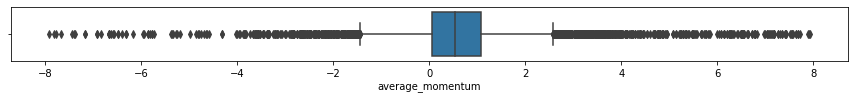

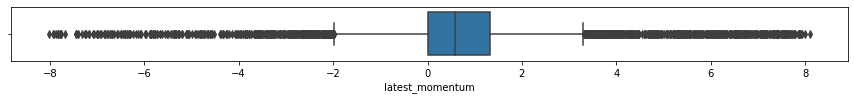

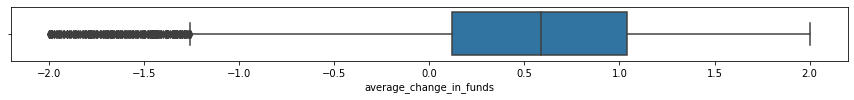

In [21]:
df.dropna(subset=['average_momentum', 'latest_momentum', 'average_change_in_funds'], inplace=True)


numerical_features = ['average_momentum', 'latest_momentum', 'average_change_in_funds']
    
for feature in numerical_features:
    fig, ax = plt.subplots(figsize=(15,1))
    sns.boxplot(data=df, x=feature)
    plt.show()

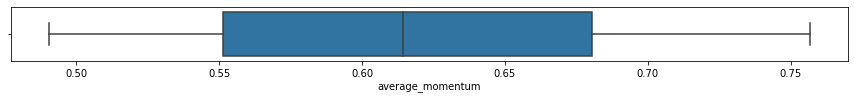

In [22]:
num_z_score = 0.1
roi_no_extreme = df[np.abs(df['average_momentum']-df['average_momentum'].mean()) <= (num_z_score*df['average_momentum'].std())]
fig, ax = plt.subplots(figsize=(15,1))
sns.boxplot(data=roi_no_extreme, x='average_momentum')
plt.show()

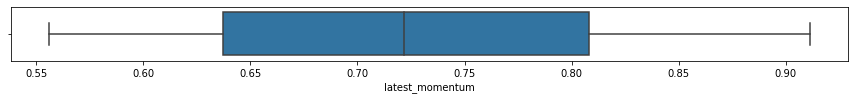

In [23]:
num_z_score = 0.1
roi_mean_no_extreme = df[np.abs(df['latest_momentum']-df['latest_momentum'].mean()) <= (num_z_score*df['latest_momentum'].std())]
fig, ax = plt.subplots(figsize=(15,1))
sns.boxplot(data=roi_mean_no_extreme, x="latest_momentum")
plt.show()

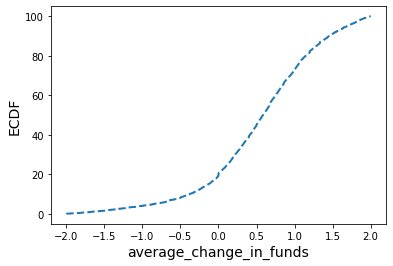

In [24]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(df['average_change_in_funds'])
# Plot the ECDF as dots
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.xlabel('average_change_in_funds', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

In [25]:
print("Percentile Report: ",np.percentile(df['average_change_in_funds'].dropna(how='any'), [68, 95, 99.7]))

Percentile Report:  [0.89660981 1.69268322 1.9734696 ]


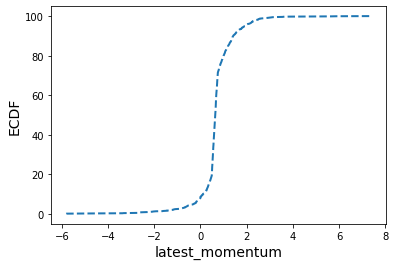

In [26]:
# Generate x and y values for ECDF: x, y
# x, y = dcst.ecdf(df['roi'])
x, y = dcst.ecdf(roi_no_extreme['latest_momentum'])
# Plot the ECDF as dots
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.xlabel('latest_momentum', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

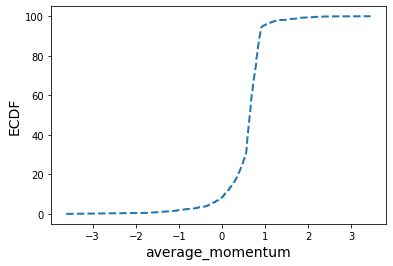

In [27]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(roi_mean_no_extreme['average_momentum'])
# Plot the ECDF as dots
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.xlabel('average_momentum', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

In [28]:
print("Percentile Report: ",np.percentile(df['average_momentum'].dropna(how='any'), [68, 95, 99.7]))

Percentile Report:  [0.85992536 2.76505504 7.07889092]


In [29]:
df = df[(df['latest_momentum'] != 0) | (df['average_change_in_funds'] != 0) | (df['average_momentum'] != 0)\
       |(df['has_acquisitions'] != 0) | (df['has_ipo'] != 0)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9569 entries, 0 to 103687
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 9569 non-null   object 
 1   status                                       9569 non-null   object 
 2   category_groups_list                         9569 non-null   object 
 3   num_funding_rounds                           9569 non-null   float64
 4   total_funding_usd                            9569 non-null   float64
 5   founded_on                                   9569 non-null   float64
 6   employee_count                               9569 non-null   object 
 7   Commerce and Shopping                        9569 non-null   int64  
 8   Financial Services                           9569 non-null   int64  
 9   Lending and Investments                      9569 non-null   int64  
 10

## Output as a CSV file

In [30]:
df.to_csv("unified_csv.csv", index=False)